In [1]:
#
# Logan Caldwell
#

%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

mothers_age_state_csv = "mothers_age_state_grouped.csv"

df_mothers_age_state = pd.read_csv(mothers_age_state_csv)

df_mothers_age_state.head(15)


,State,State Code,County,County Code,Age of Mother,Age of Mother Code,Deaths,Births,Death Rate
0,Alabama,1.0,"Jefferson County, AL",1073.0,20-24 years,20-24,24.0,1886.0,12.73
1,Alabama,1.0,"Jefferson County, AL",1073.0,25-29 years,25-29,26.0,2650.0,9.81
2,Alabama,1.0,"Jefferson County, AL",1073.0,30-34 years,30-34,25.0,2384.0,10.49
3,Alabama,1.0,"Madison County, AL",1089.0,25-29 years,25-29,10.0,1360.0,7.35 (Unreliable)
4,Alabama,1.0,"Mobile County, AL",1097.0,20-24 years,20-24,17.0,1586.0,10.72 (Unreliable)
5,Alabama,1.0,"Mobile County, AL",1097.0,25-29 years,25-29,12.0,1751.0,6.85 (Unreliable)
6,Alabama,1.0,"Mobile County, AL",1097.0,30-34 years,30-34,14.0,1172.0,11.95 (Unreliable)
7,Alabama,1.0,"Unidentified Counties, AL",1999.0,15-19 years,15-19,34.0,3325.0,10.23
8,Alabama,1.0,"Unidentified Counties, AL",1999.0,20-24 years,20-24,117.0,11707.0,9.99
9,Alabama,1.0,"Unidentified Counties, AL",1999.0,25-29 years,25-29,97.0,12888.0,7.53


In [2]:
df_mothers_age_state.describe()

### Dropna working correctly here??
df_mothers_age_state.dropna(axis=0, how="any")
df_mothers_age_state["Age of Mother"].unique()

array(['20-24 years', '25-29 years', '30-34 years', '15-19 years',
       '35-39 years', '40-44 years', nan], dtype=object)

In [3]:
df_mothers_age_state.mean()

State Code        28.001565
County Code    28355.599374
Deaths            28.884194
Births          4676.508607
dtype: float64

In [4]:
ages_15_19 = df_mothers_age_state[df_mothers_age_state["Age of Mother"] == "15-19 years"]
ages_20_24 = df_mothers_age_state[df_mothers_age_state["Age of Mother"] == "20-24 years"]
ages_25_29 = df_mothers_age_state[df_mothers_age_state["Age of Mother"] == "25-29 years"]
ages_30_34 = df_mothers_age_state[df_mothers_age_state["Age of Mother"] == "30-34 years"]
ages_35_39 = df_mothers_age_state[df_mothers_age_state["Age of Mother"] == "35-39 years"]
ages_40_44 = df_mothers_age_state[df_mothers_age_state["Age of Mother"] == "40-44 years"]

ages_15_19["Death Rate"] = ages_15_19["Death Rate"].str.replace("\s*\(Unreliable\)", "")
ages_20_24["Death Rate"] = ages_20_24["Death Rate"].str.replace("\s*\(Unreliable\)", "")
ages_25_29["Death Rate"] = ages_25_29["Death Rate"].str.replace("\s*\(Unreliable\)", "")
ages_30_34["Death Rate"] = ages_30_34["Death Rate"].str.replace("\s*\(Unreliable\)", "")
ages_35_39["Death Rate"] = ages_35_39["Death Rate"].str.replace("\s*\(Unreliable\)", "")
ages_40_44["Death Rate"] = ages_40_44["Death Rate"].str.replace("\s*\(Unreliable\)", "")

C:\Users\lscca\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lscca\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\lscca\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [5]:
ages_15_19["Death Rate"] = ages_15_19["Death Rate"].astype(float)
ages_20_24["Death Rate"] = ages_20_24["Death Rate"].astype(float)
ages_25_29["Death Rate"] = ages_25_29["Death Rate"].astype(float)
ages_30_34["Death Rate"] = ages_30_34["Death Rate"].astype(float)
ages_35_39["Death Rate"] = ages_35_39["Death Rate"].astype(float)
ages_40_44["Death Rate"] = ages_40_44["Death Rate"].astype(float)

ages_15_19_IMR_mean = (ages_15_19["Death Rate"].mean())
ages_20_24_IMR_mean = (ages_20_24["Death Rate"].mean())
ages_25_29_IMR_mean = (ages_25_29["Death Rate"].mean())
ages_30_34_IMR_mean = (ages_30_34["Death Rate"].mean())
ages_35_39_IMR_mean = (ages_35_39["Death Rate"].mean())
ages_40_44_IMR_mean = (ages_40_44["Death Rate"].mean())

IMR_rate_means_by_age_list = [ages_15_19_IMR_mean,ages_20_24_IMR_mean,ages_25_29_IMR_mean,ages_30_34_IMR_mean,ages_35_39_IMR_mean,ages_40_44_IMR_mean]
IMR_rate_means_by_age_list

C:\Users\lscca\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lscca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lscca\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

[10.331632653061227,
 8.381103448275864,
 6.3341758241758255,
 5.59811320754717,
 6.527252747252748,
 9.461538461538462]

In [6]:
df_mothers_age_state_means = df_mothers_age_state.mean()
df_mothers_age_state_means.head()

State Code        28.001565
County Code    28355.599374
Deaths            28.884194
Births          4676.508607
dtype: float64

In [7]:
df_mothers_age_state.set_index("State")
df_mothers_age_state_grouped = df_mothers_age_state.groupby(by="State", group_keys=True,)
df_mothers_age_state.mean()

State Code        28.001565
County Code    28355.599374
Deaths            28.884194
Births          4676.508607
dtype: float64

In [8]:
age_ticks = [0,1,2,3,4,5]
age_ranges_list = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44"]

x=[0,1,2,3,4,5]

<IPython.core.display.Javascript object>


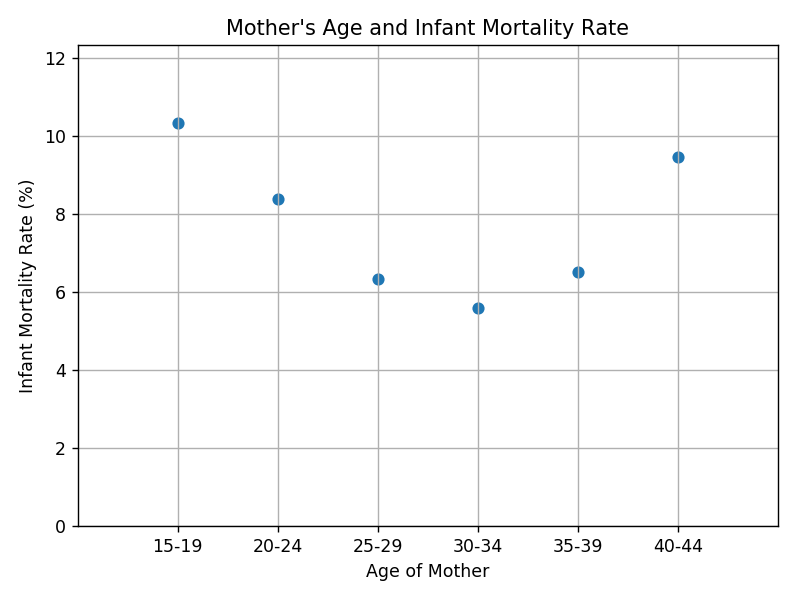

In [9]:
m_age_IMR_plot = plt.scatter(age_ranges_list, IMR_rate_means_by_age_list, )

In [16]:
plt.title("Mother's Age and Infant Mortality Rate")
plt.xlabel("Age of Mother")
plt.ylabel("Infant Mortality Rate (%)")
plt.grid()
# plt.legend(loc="best", labels=age_ranges_list)
plt.xlim(-1,6)
plt.ylim(0, max(IMR_rate_means_by_age_list)+2)
plt.tight_layout()

In [17]:
plt.show()

In [18]:
plt.savefig("IMR_and_age_of_mother_plot")